In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown as md

### 1. Reading the data set to python env

In [2]:
car = pd.read_csv('cars_data.csv')
df = pd.DataFrame(car)
df

,Make,Model,Nickname,Car Gender,Buyer Gender,Buyer Age,Buzzword,Country,City,Dealer Latitude,Dealer Longitude,Color,New Car,Purchase Date,Sale Price,Discount,Resell Price,5-yr Depreciation,Top Speed,0-60 Time
0,Suzuki,Vitara,Philippine,Female,Female,51,User-friendly,Belgium,Antwerpen,51.247239,4.440346,Yellow,False,19/07/2009,54806.14,0.2467,33858.32,0.13,200.9,11.5
1,Honda,S2000,Henrik,Male,Male,30,analyzing,China,Jinhu,33.025433,119.020584,Crimson,False,26/10/2015,51826.30,0.3147,2989.28,0.02,158.5,8.8
2,BMW,Z4,Lebbie,Male,Female,54,software,China,Gemo,30.916207,121.677640,Khaki,False,28/03/2010,82929.14,0.5414,35049.16,0.24,149.5,14.4
3,Toyota,Tacoma,Jefferey,Female,Male,68,monitoring,Portugal,Queluz de Baixo,38.745168,-9.267087,Puce,False,07/05/2008,56928.66,0.0850,8236.15,0.20,153.3,11.5
4,Ford,Festiva,Glendon,Female,Male,70,Sharable,Latvia,Jaunpils,56.729980,23.016588,Yellow,False,01/06/2008,77201.26,0.1642,32765.76,0.18,122.0,14.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Mazda,Tribute,Cooper,Male,Male,44,hardware,Pakistan,Chishtiān Mandi,29.919386,73.074787,Pink,False,05/01/2020,58580.65,0.1611,42640.82,0.14,245.8,8.0
9996,GMC,Sierra 2500,Dud,Male,Male,40,Enhanced,Costa Rica,Ángeles,10.075000,-84.241523,Puce,False,28/12/2005,75229.74,0.2691,21115.58,0.11,147.4,12.3
9997,Mercury,Mariner,Chariot,Male,Male,37,monitoring,Poland,Dąbrowice,52.311923,19.084965,Blue,False,08/03/2013,34755.44,0.2493,2731.25,0.12,198.1,11.8
9998,Daewoo,Leganza,Dynah,Female,Female,21,cohesive,Philippines,Villasis,15.901640,120.587828,Teal,True,21/02/2008,98725.42,0.4654,18718.58,0.04,206.7,12.2


### 2. Checking whether any null values are present in the data set (multiple ways)

##### a. summing flat arrays is somehow faster than counting, so this code seems faster:

In [3]:
df.isnull().values.any()

False

##### b. The function dataframe .isnull().sum().sum() returns the number of missing values in the data set.

In [4]:
df.isnull().sum().sum()

0

##### c. If you make it df.isnull().any(), you can just find the columns that have NaN values:

In [5]:
df.isnull().any()

Make                 False
Model                False
Nickname             False
Car Gender           False
Buyer Gender         False
Buyer Age            False
Buzzword             False
Country              False
City                 False
Dealer Latitude      False
Dealer Longitude     False
Color                False
New Car              False
Purchase Date        False
Sale Price           False
Discount             False
Resell Price         False
5-yr Depreciation    False
Top Speed            False
0-60 Time            False
dtype: bool

##### d.  This returns a boolean value

In [6]:
df.isnull().any().any()

False

##### e. If you need to know how many rows there are with "one or more NaNs":

In [7]:
df.isnull().T.any().T.sum()

0

##### f. Starting from v0.23.2, you can use DataFrame.isna + DataFrame.any(axis=None) where axis=None specifies logical reduction over the entire DataFrame.

In [8]:
df.isna().any(axis=None)

False

### 3. Plotting a bar graph of male vs female buyers who participated in the sales.

##### a. Count plot of male vs female

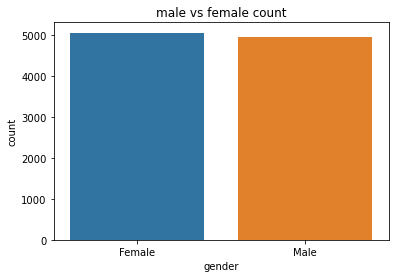

According to this dataset, women have bought slightly more cars than men

In [70]:
sns.countplot(data = df, x = 'Buyer Gender')
plt.title('male vs female count')
plt.xlabel('gender')
plt.show()
md('According to this dataset, women have bought slightly more cars than men')

##### b. Graph to show which gender spends more on cars

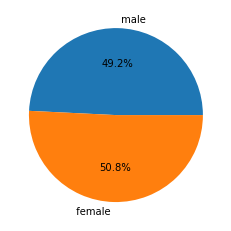

It is no surprise that women have spend more money on cars, since they have bought more cars than men

In [69]:
men = df[df['Buyer Gender'] == 'Male']
women = df[df['Buyer Gender'] == 'Female']
a = men['Sale Price'].sum()
b = women['Sale Price'].sum()

data = [a, b]

plt.pie(data, labels = [' male ',' female '], autopct='%1.1f%%')
plt.show()

md('It is no surprise that women have spend more money on cars, since they have bought more cars than men')

### 4. Find the top 5 cars based on their sales price

In [122]:
a = df.nlargest(5,'Sale Price')
b = list(a['Make'])
count = 1
string = ""
for i in b:
    string += str(count) + ". " + str(i) + "\n"
    count += 1
md(string)


1. Volkswagen
2. Audi
3. Lexus
4. Mazda
5. Lexus


### 5. Find the least 5 cars based on their Resell price

In [124]:
c = df.nsmallest(5,'Resell Price')
d = list(c['Make'])
count = 1
string = ""
for i in d:
    string += str(count) + ". " + str(i) + "\n"
    count += 1
md(string)

1. Chevrolet
2. GMC
3. Jaguar
4. Mitsubishi
5. Infiniti
